In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("data/merged_data_191.csv")

In [4]:
df.head()

,HR,P,PR,QRS,QT,QTc,P_Axis,QRS_Axis,T_Axis,RV5,SV1,target
0,64,77,102,127,463,480,24,-14,77,1.451,0.244,1
1,61,102,168,101,405,409,69,75,71,1.157,0.234,1
2,70,87,123,80,400,434,78,76,63,1.672,0.519,1
3,84,105,162,102,361,429,65,36,51,1.683,0.945,0
4,71,116,155,93,404,439,25,8,64,0.851,0.930,1


In [7]:
df.shape

(191, 12)

In [9]:
df.isnull().sum()

HR          0
P           0
PR          0
QRS         0
QT          0
QTc         0
P_Axis      0
QRS_Axis    0
T_Axis      0
RV5         0
SV1         0
target      0
dtype: int64

In [5]:
df.corr()

,HR,P,PR,QRS,QT,QTc,P_Axis,QRS_Axis,T_Axis,RV5,SV1,target
HR,1.000000,-0.201266,-0.219225,0.008092,-0.678703,0.379689,0.034348,0.018177,-0.031451,-0.299474,-0.172730,-0.092356
P,-0.201266,1.000000,0.873569,0.145941,0.183321,0.049663,0.285551,-0.157588,0.096359,0.202562,0.103119,-0.020536
PR,-0.219225,0.873569,1.000000,0.139867,0.263515,0.119607,0.243257,-0.272513,0.121888,0.088645,0.109055,-0.021349
QRS,0.008092,0.145941,0.139867,1.000000,0.293511,0.334099,-0.017559,-0.132502,0.365783,-0.156246,0.278294,0.246342
QT,-0.678703,0.183321,0.263515,0.293511,1.000000,0.387616,-0.091843,-0.226338,0.102778,-0.049344,0.021785,0.213020
QTc,0.379689,0.049663,0.119607,0.334099,0.387616,1.000000,-0.020669,-0.296366,0.133593,-0.461226,-0.119500,0.106437
P_Axis,0.034348,0.285551,0.243257,-0.017559,-0.091843,-0.020669,1.000000,0.161840,0.104909,0.096702,0.228331,-0.075365
QRS_Axis,0.018177,-0.157588,-0.272513,-0.132502,-0.226338,-0.296366,0.161840,1.000000,-0.032856,0.150495,-0.078382,-0.045392
T_Axis,-0.031451,0.096359,0.121888,0.365783,0.102778,0.133593,0.104909,-0.032856,1.000000,-0.236563,0.205372,0.164000
RV5,-0.299474,0.202562,0.088645,-0.156246,-0.049344,-0.461226,0.096702,0.150495,-0.236563,1.000000,0.115028,-0.063924


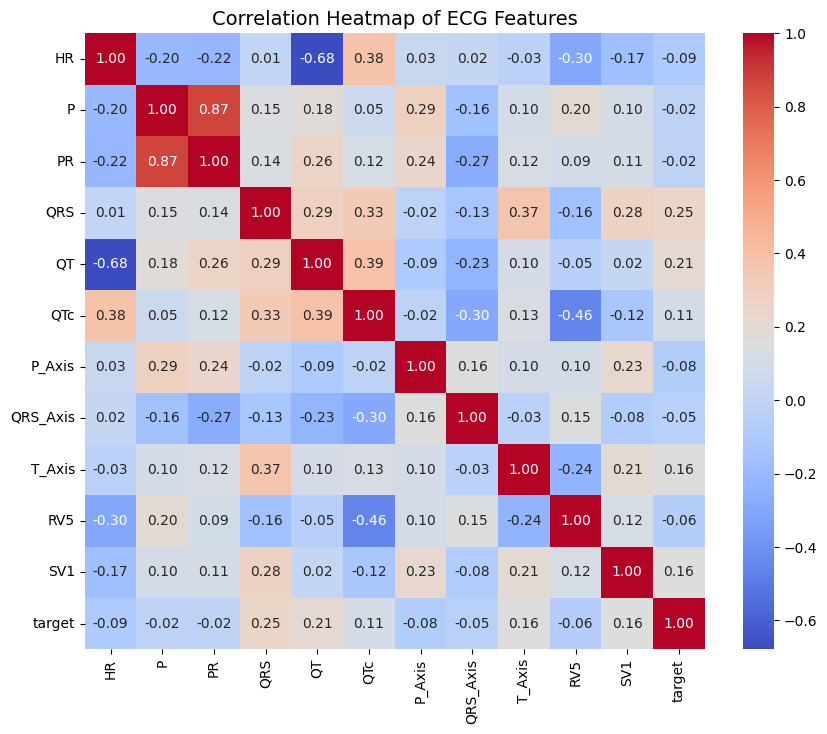

In [6]:

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap of ECG Features", fontsize=14)
plt.show()

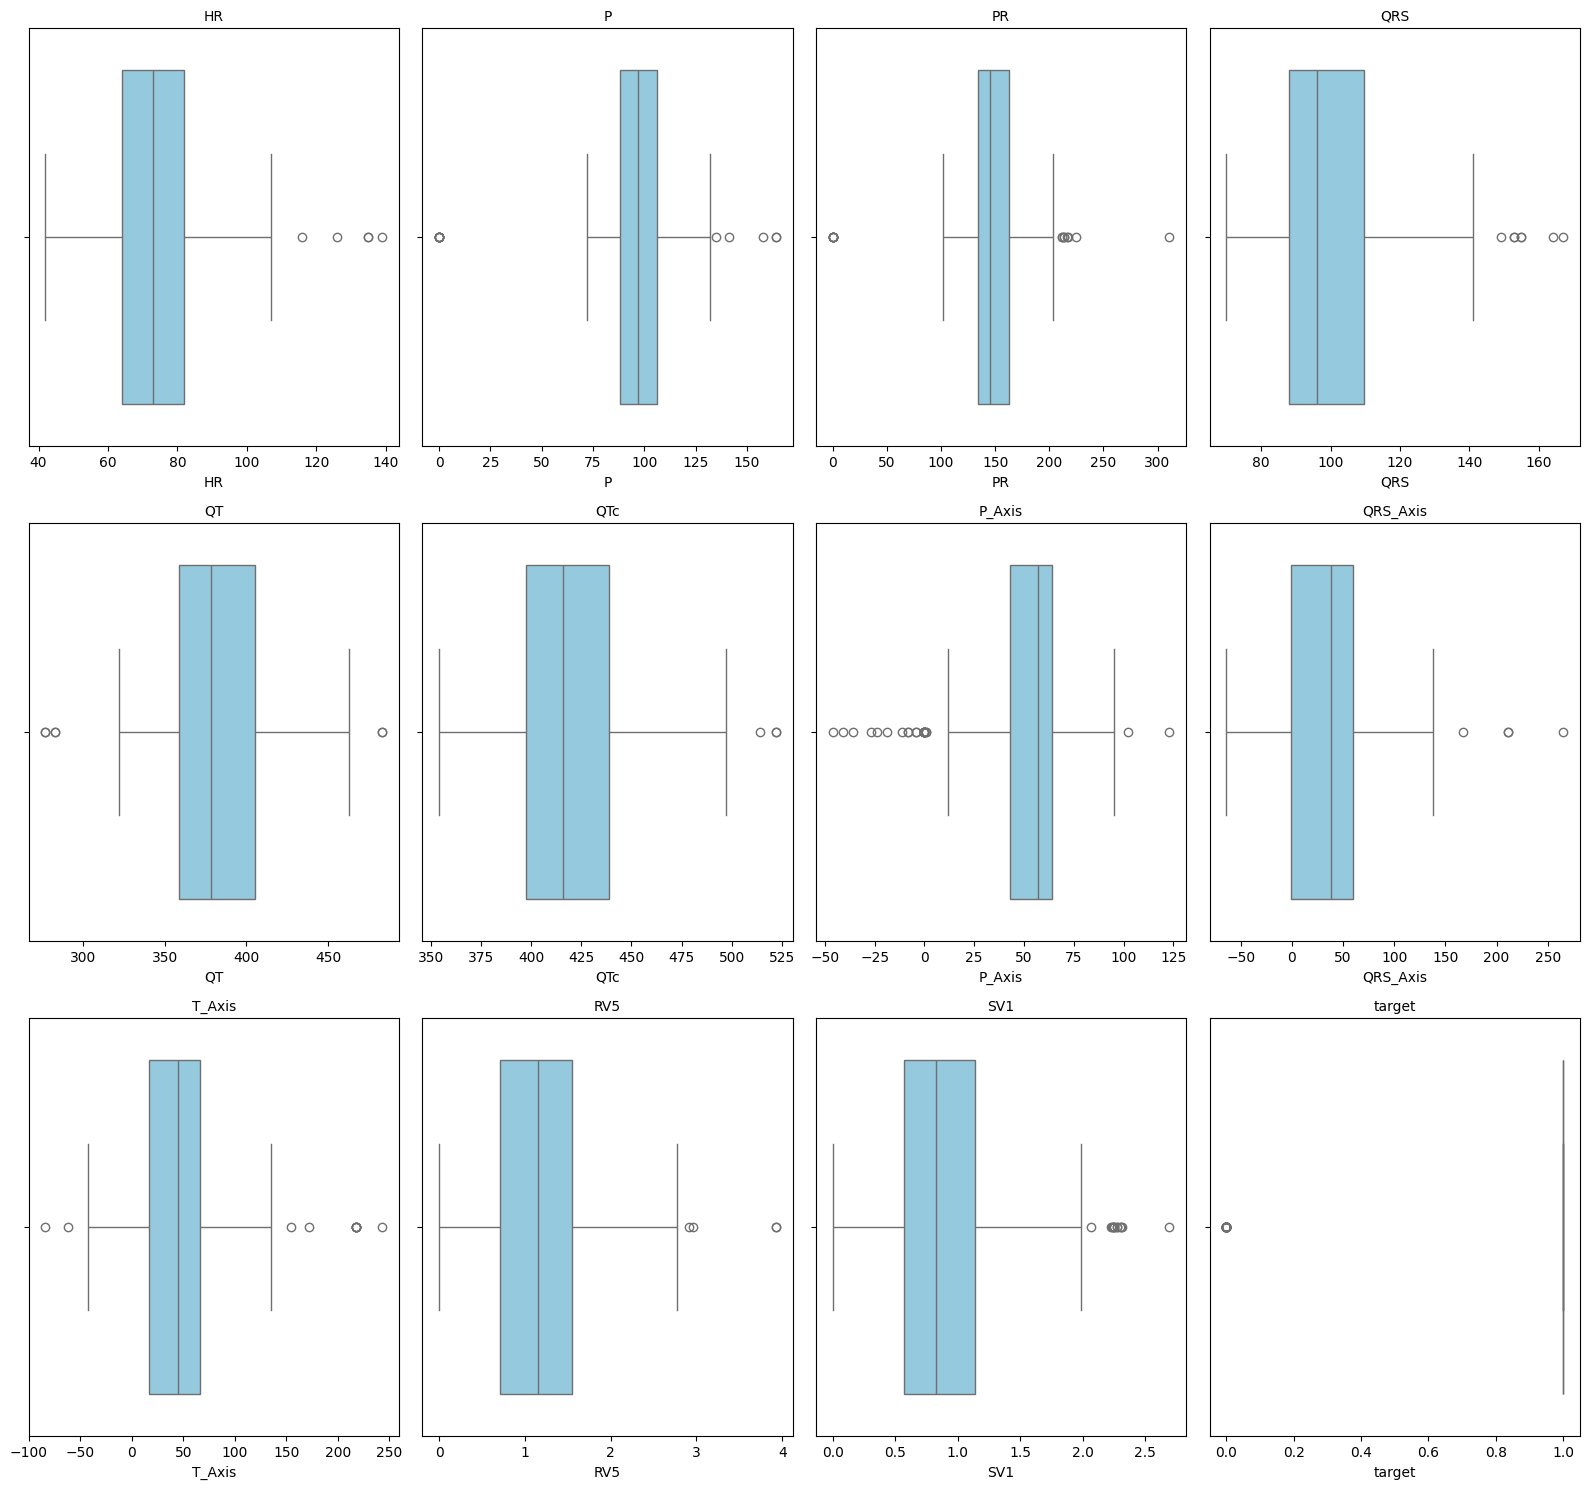

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Number of plots per row
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # auto rows

# Create subplots grid
plt.figure(figsize=(4*n_cols, 5*n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()

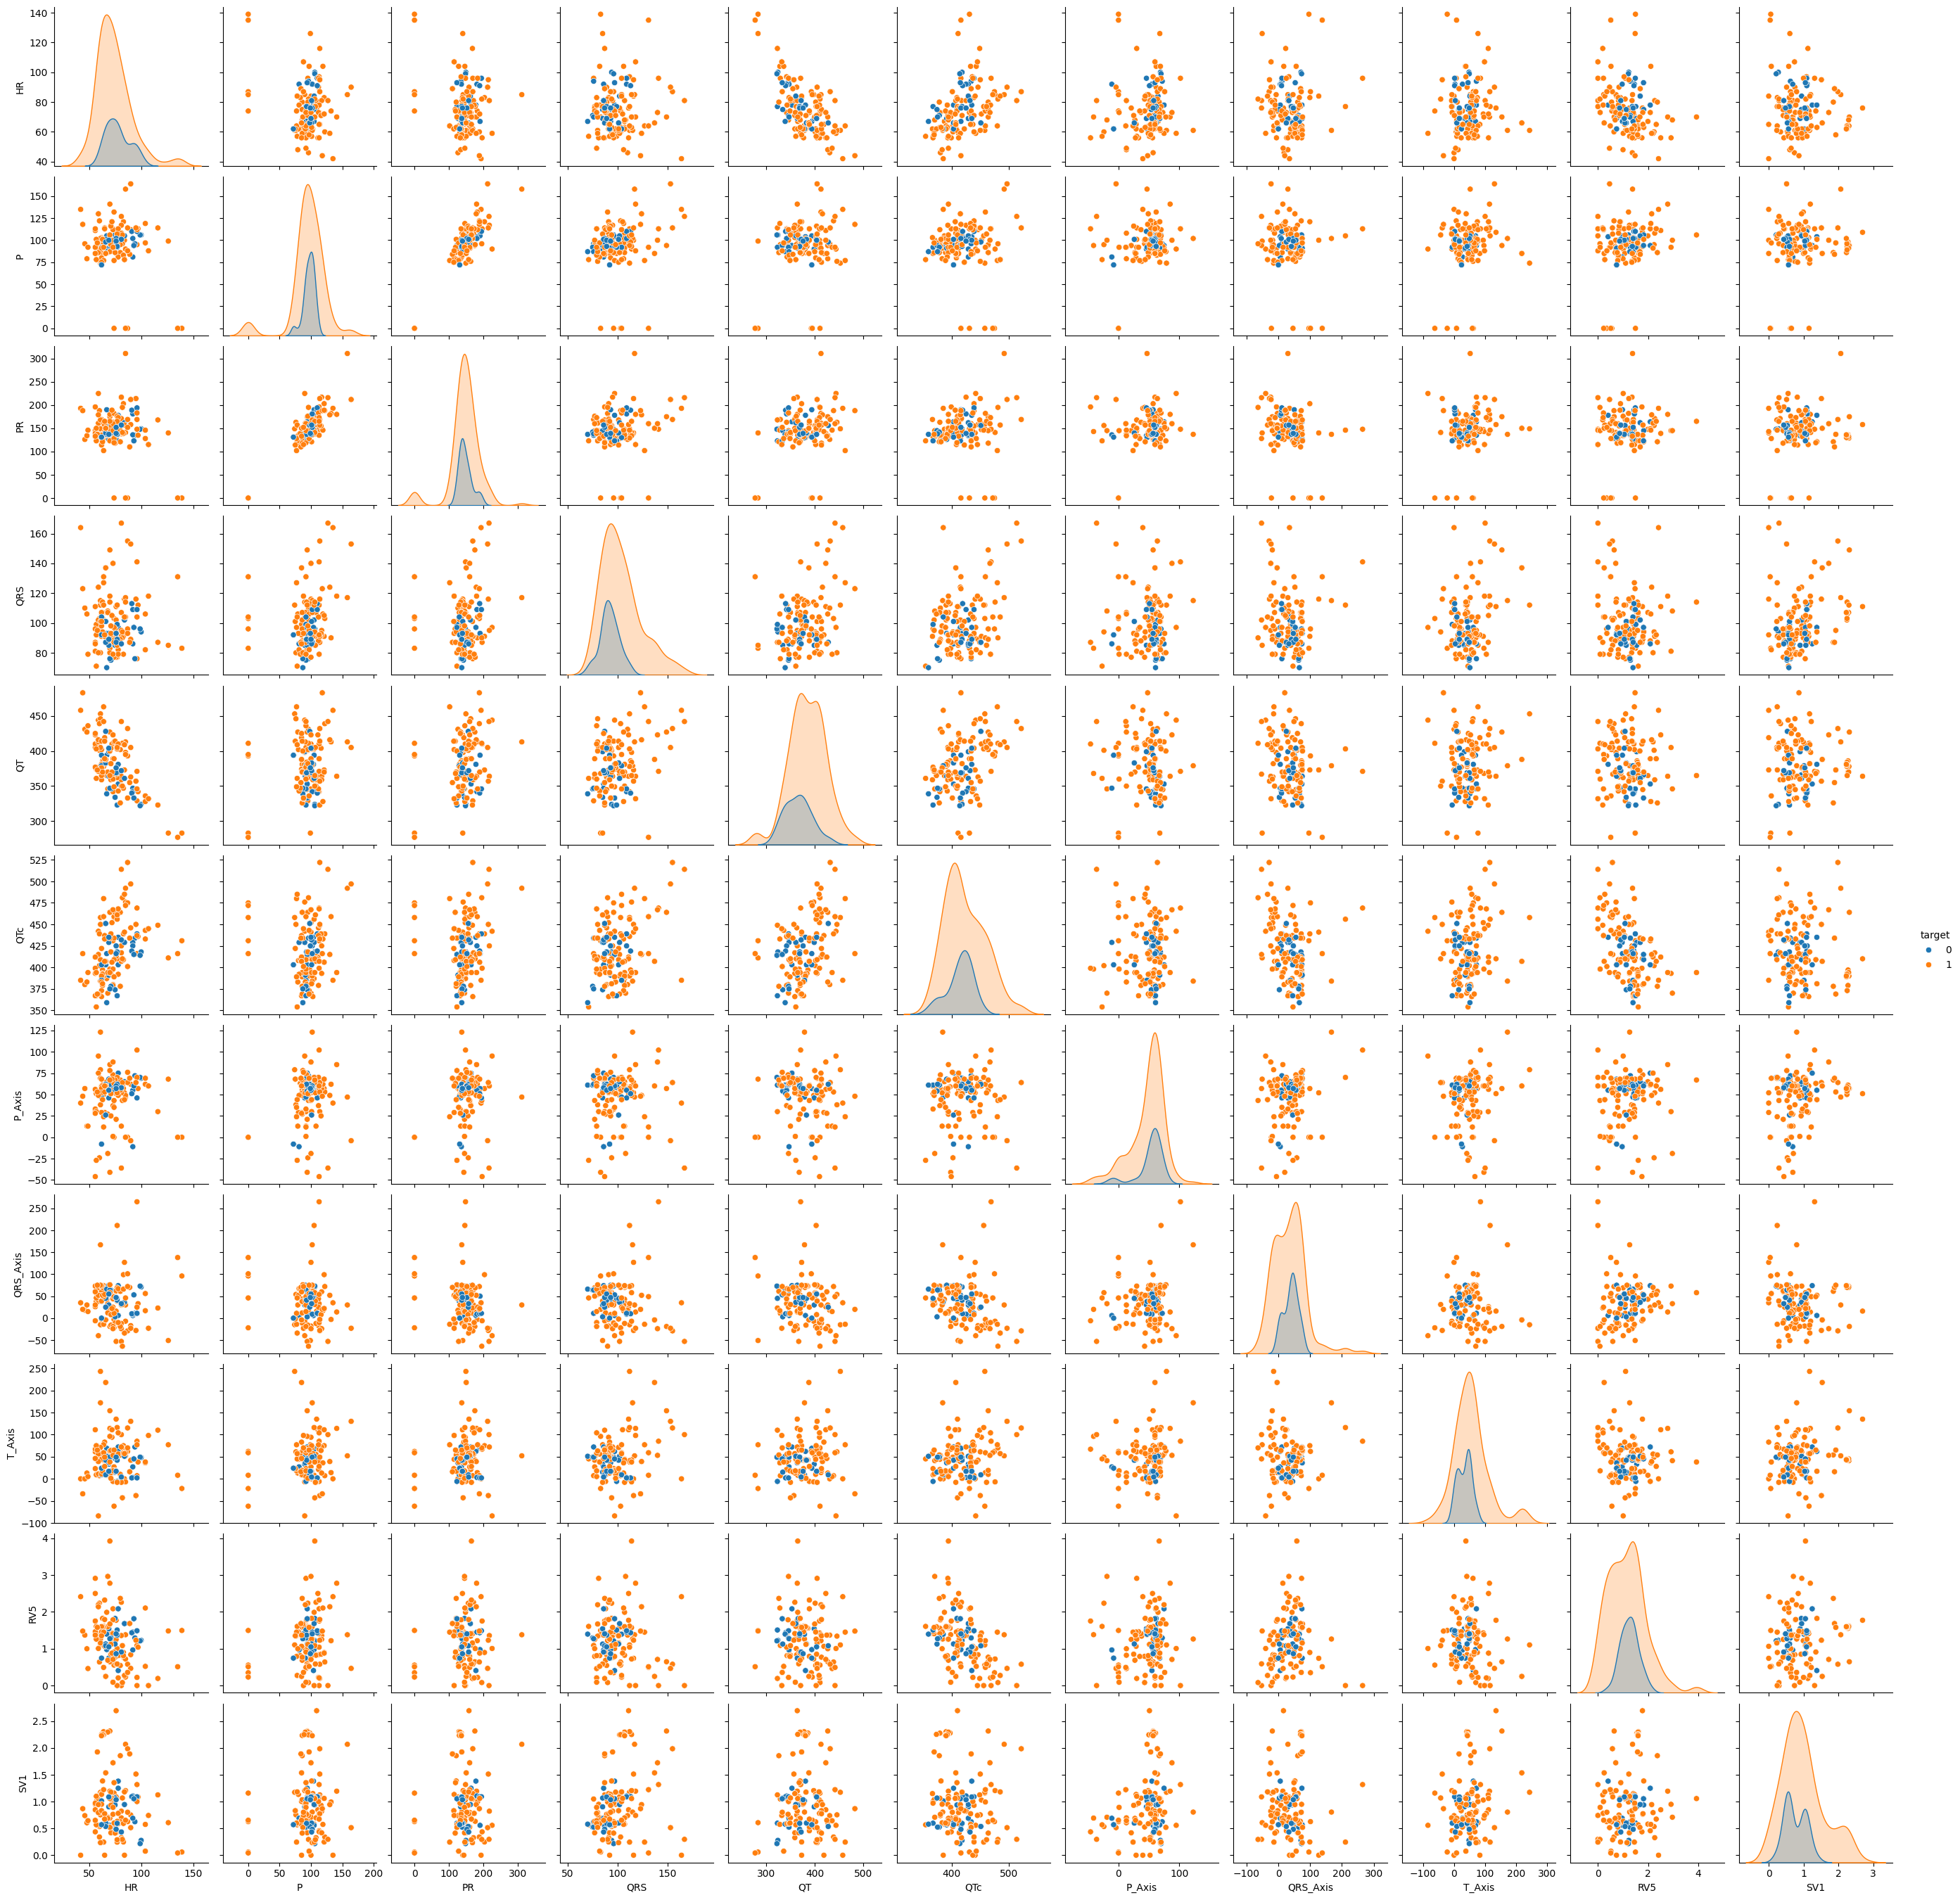

In [11]:
sns.pairplot(df,hue = 'target')
plt.show()